In [1]:
import pandas as pd
import numpy as np

import acquire_w

import requests
from bs4 import BeautifulSoup

In [2]:
#import NLP transformers 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#import classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# data = acquire_w.scrape_github_data()

In [ ]:
# pd.DataFrame(data)

In [ ]:
# pd.DataFrame(data).to_csv('github.csv')

In [3]:
data = pd.read_csv('github.csv', index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             846 non-null    object
 1   language         752 non-null    object
 2   readme_contents  846 non-null    object
dtypes: object(3)
memory usage: 26.4+ KB


In [5]:
data.language.value_counts()

C#                   107
TypeScript            91
Python                83
Go                    82
PowerShell            62
JavaScript            42
Bicep                 42
HCL                   37
Shell                 36
Java                  30
C                     30
Jupyter Notebook      22
HTML                  14
Ruby                  11
C++                    7
Rust                   6
PHP                    6
Dockerfile             5
BitBake                4
Swift                  4
CSS                    3
Scala                  3
Objective-C            3
Rich Text Format       3
CMake                  2
Open Policy Agent      2
R                      2
TSQL                   2
Batchfile              2
Perl                   1
Pug                    1
CoffeeScript           1
Kotlin                 1
SCSS                   1
Mathematica            1
Mustache               1
Jinja                  1
XSLT                   1
Name: language, dtype: int64

In [6]:
l = ['C#', 'PowerShell', 'Go', 'TypeScript', 'Python', 'JavaScript']

data.language = np.where(data.language.isin(l), data.language, np.nan)

In [7]:
data = data.dropna()

In [8]:
data.language.value_counts()

C#            107
TypeScript     91
Python         83
Go             82
PowerShell     62
JavaScript     42
Name: language, dtype: int64

In [12]:
import wrangle

In [13]:
data.readme_contents = data.readme_contents.apply(wrangle.basic_clean)\
.apply(wrangle.tokenize)\
.apply(wrangle.lemmatize)\
.apply(wrangle.remove_stopwords, extra_words=['azure','http','com','microsoft','github','service','resource','function','project','doc'])


In [30]:
master_list = ['function', 'service', '1', 'sample', 'nuget', 'net', 'sdk', 'doc', 'extension', 'use', 'project ', 'template', 'code', 'using', 'build', 'file', 'md', 'dotnet', 'u', 'package', 'go', 'g', 'resource', 'name', 'version', 'cla', '0', 'run', 'io', 'ak', 'id', 'powershell', 'doc', 'project', 'issue', 'en', 'repository', 'deployment', 'subscription', 'cloud', 'script', 'action', 'app', 'function', 'container', 'deploy', 'create',  'cli', 'python', 'data', 'client', '9', 'node', 'extension', 'model', 'command', '2', 'node', 'action', 'install', 'npm', 'workflow', 'j', 'api']

In [31]:
data.head()

,repo,language,readme_contents
1,Azure/azure-docs-sdk-dotnet,Python,documentation net sdk apis overview repository...
3,Azure/AgentBaker,Go,agentbaker coverage status coverall io repos a...
6,Azure/communication-ui-library,TypeScript,ui library banner image png image ui library b...
7,Azure/azure-linux-extensions,Python,linux extension iaa provides source code linux...
8,Azure/azureml-assets,Python,preview feature contained repository private p...


In [32]:
def filter_words(text):
    return ' '.join([word for word in text.split() if word in master_list])

In [33]:
data['readme_contents'] = data['readme_contents'].apply(lambda x: filter_words(x))

In [34]:
data.head()

,repo,language,readme_contents
1,Azure/azure-docs-sdk-dotnet,Python,net sdk repository net sdk api dotnet api dotn...
3,Azure/AgentBaker,Go,io io node template script build template api ...
6,Azure/communication-ui-library,TypeScript,io npm version io j package io io build workfl...
7,Azure/azure-linux-extensions,Python,extension code extension extension extension e...
8,Azure/azureml-assets,Python,repository version use en u en u en u use en u...


- handled nulls
- converted things to Other

In [35]:
train, validate, test = wrangle.split_data(data, 'language')

train -> (261, 3), 55.89%
validate -> (112, 3),23.98%
test -> (94, 3), 20.13%


In [36]:
train.language.value_counts()

C#            59
TypeScript    51
Go            46
Python        46
PowerShell    35
JavaScript    24
Name: language, dtype: int64

In [ ]:
c_words = ' '.join(train[train.language == 'C#'].readme_contents)
go_words = ' '.join(train[train.language == 'Go'].readme_contents)
powershell_words = ' '.join(train[train.language == 'PowerShell'].readme_contents)
typescript_words = ' '.join(train[train.language == 'TypeScript'].readme_contents)
python_words = ' '.join(train[train.language == 'Python'].readme_contents)
javascript_words = ' '.join(train[train.language == 'JavaScript'].readme_contents)

In [ ]:
all_words

In [ ]:
pd.Series(c_words.split()).value_counts().head(20)
pd.Series(go_words.split()).value_counts().head(20)
pd.Series(powershell_words.split()).value_counts().head(20)
pd.Series(typescript_words.split()).value_counts().head(20)
pd.Series(python_words.split()).value_counts().head(20)
pd.Series(javascript_words.split()).value_counts().head(20)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(321)
pd.Series(powershell_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('PowerShell')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')

plt.subplot(322)
pd.Series(c_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('C#')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')

plt.subplot(323)
pd.Series(typescript_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('TypeScript')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')

plt.subplot(324)
pd.Series(go_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('Go')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')

plt.subplot(325)
pd.Series(python_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('Python')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')

plt.subplot(326)
pd.Series(javascript_words.split()).value_counts().head(20).plot.barh(color='pink', width=.9)
plt.title('JavaScript')
plt.ylabel('Word')
plt.xlabel('Num Occurrences')
# make the labels pretty
# ticks, _ = plt.yticks()
# labels = top_20_lem_bigrams.reset_index()[‘index’].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)

plt.tight_layout()
plt.show()

In [37]:
# features = ['readme_contents']

X_train = train.readme_contents
y_train = train.language
X_validate = validate.readme_contents
y_validate = validate.language
X_test = test.readme_contents
y_test = test.language

In [38]:
X_train.head()

456    data container sample sample data container ve...
329    cloud build 1 2 1 2 io code run use issue en u...
61     ak ak action workflow ak action workflow io ak...
55     2 0 powershell 2 0 powershell 2 0 powershell p...
714    action action workflow deploy en run file file...
Name: readme_contents, dtype: object

### Iteration 1: Count and Decision

In [70]:
#get two words at once!
cv = CountVectorizer()

X_train_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)

In [40]:
df = pd.DataFrame(X_train_bow.todense(), columns=cv.get_feature_names_out())

In [41]:
df.head()

,action,ak,api,app,build,cla,cli,client,cloud,code,...,run,sample,script,sdk,subscription,template,use,using,version,workflow
0,0,0,0,0,2,5,0,0,0,2,...,2,2,0,0,0,0,1,1,1,0
1,0,0,0,0,1,5,0,0,3,3,...,1,0,0,0,0,0,2,1,1,0
2,2,6,1,0,0,0,0,4,3,0,...,2,0,1,0,1,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,2,5,5,0,1,3,...,6,5,6,1,4,3,2,12,0,11


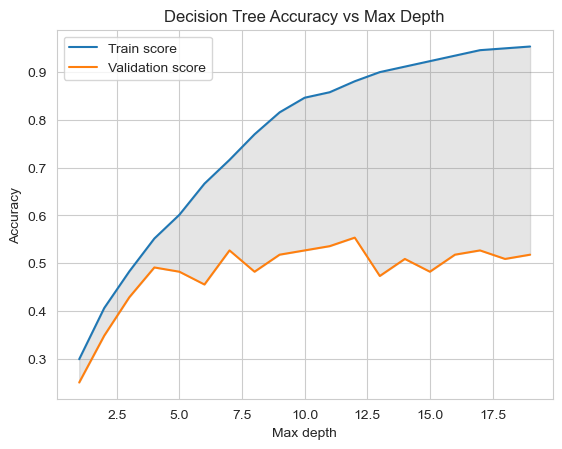

,max_depth,train_acc,val_acc,score_diff
0,1,0.298851,0.250000,0.048851
1,2,0.406130,0.348214,0.057916
2,3,0.482759,0.428571,0.054187
3,4,0.551724,0.491071,0.060653
4,5,0.601533,0.482143,0.119390
5,6,0.666667,0.455357,0.211310
6,7,0.716475,0.526786,0.189689
7,8,0.770115,0.482143,0.287972
8,9,0.816092,0.517857,0.298235
9,10,0.846743,0.526786,0.319958


In [71]:
decision_tree(X_train_bow, X_validate_bow, y_train, y_validate)

In [42]:
#build my model
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train_bow, y_train)
tree.score(X_train_bow, y_train)

0.8467432950191571

In [43]:
tree.score(X_validate_bow, y_validate)

0.5178571428571429

In [44]:
for x in range(1,20):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train_bow, y_train)
    t = tree.score(X_train_bow, y_train)
    v = tree.score(X_validate_bow, y_validate)
    print(f'Leaf number: {x}')
    print(f'Train: {t}')
    print(f'Validate: {v}')
    print(f'Difference: {v - t}')
    print('==================')
    print()

Leaf number: 1
Train: 0.2988505747126437
Validate: 0.25
Difference: -0.0488505747126437

Leaf number: 2
Train: 0.4061302681992337
Validate: 0.3482142857142857
Difference: -0.057915982484948

Leaf number: 3
Train: 0.4827586206896552
Validate: 0.4375
Difference: -0.045258620689655193

Leaf number: 4
Train: 0.5517241379310345
Validate: 0.5
Difference: -0.051724137931034475

Leaf number: 5
Train: 0.6015325670498084
Validate: 0.4732142857142857
Difference: -0.1283182813355227

Leaf number: 6
Train: 0.6666666666666666
Validate: 0.45535714285714285
Difference: -0.21130952380952378

Leaf number: 7
Train: 0.7164750957854407
Validate: 0.49107142857142855
Difference: -0.22540366721401212

Leaf number: 8
Train: 0.7701149425287356
Validate: 0.4732142857142857
Difference: -0.2969006568144499

Leaf number: 9
Train: 0.8160919540229885
Validate: 0.49107142857142855
Difference: -0.32502052545155996

Leaf number: 10
Train: 0.8467432950191571
Validate: 0.49107142857142855
Difference: -0.3556718664477286



### Iteration 2: TF-IDF and Decision

In [45]:
tfidf = TfidfVectorizer()

X_train_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [47]:
for x in range(1,20):
    tfidf = TfidfVectorizer()

    X_train_bow = tfidf.fit_transform(X_train)
    X_validate_bow = tfidf.transform(X_validate)
    
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train_bow, y_train)
    
    t = tree.score(X_train_bow, y_train)
    v = tree.score(X_validate_bow, y_validate)
    print(f'Leaf number: {x}')
    print(f'Train: {t}')
    print(f'Validate: {v}')
    print(f'Difference: {v - t}')
    print('==================')
    print()

Leaf number: 1
Train: 0.2988505747126437
Validate: 0.25
Difference: -0.0488505747126437

Leaf number: 2
Train: 0.4099616858237548
Validate: 0.3392857142857143
Difference: -0.0706759715380405

Leaf number: 3
Train: 0.47509578544061304
Validate: 0.38392857142857145
Difference: -0.09116721401204159

Leaf number: 4
Train: 0.524904214559387
Validate: 0.4107142857142857
Difference: -0.11418992884510126

Leaf number: 5
Train: 0.6053639846743295
Validate: 0.4017857142857143
Difference: -0.2035782703886152

Leaf number: 6
Train: 0.6704980842911877
Validate: 0.4375
Difference: -0.23299808429118773

Leaf number: 7
Train: 0.7164750957854407
Validate: 0.375
Difference: -0.34147509578544066

Leaf number: 8
Train: 0.7586206896551724
Validate: 0.4107142857142857
Difference: -0.3479064039408867

Leaf number: 9
Train: 0.8160919540229885
Validate: 0.4017857142857143
Difference: -0.4143062397372742

Leaf number: 10
Train: 0.842911877394636
Validate: 0.4107142857142857
Difference: -0.4321975916803503

Leaf

### Count and Random

In [67]:
#get two words at once!
cv = CountVectorizer()

X_train_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)

In [49]:
forest = RandomForestClassifier(max_depth=5, min_samples_leaf=5)

forest.fit(X_train_bow, y_train)
forest.score(X_train_bow, y_train)

0.7318007662835249

In [50]:
forest.score(X_validate_bow, y_validate)

0.5446428571428571

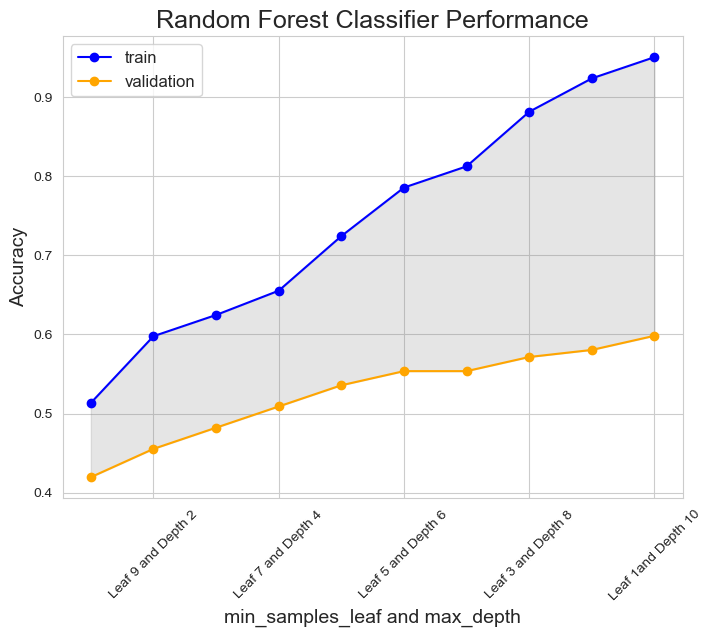

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.950192,0.598214,0.351977
1,2,9,0.923372,0.580357,0.343015
2,3,8,0.881226,0.571429,0.309797
3,4,7,0.812261,0.553571,0.258689
4,5,6,0.785441,0.553571,0.231869
5,6,5,0.724138,0.535714,0.188424
6,7,4,0.655172,0.508929,0.146244
7,8,3,0.624521,0.482143,0.142378
8,9,2,0.597701,0.455357,0.142344
9,10,1,0.513410,0.419643,0.093767


In [68]:
random_forest_scores(X_train_bow, y_train, X_validate_bow, y_validate)

In [51]:
for x in range(1,20):
    cv = CountVectorizer()
    
    X_train_bow = cv.fit_transform(X_train)
    X_validate_bow = cv.transform(X_validate)
    
    forest = RandomForestClassifier(max_depth=x, min_samples_leaf=(20-x))
    forest.fit(X_train_bow, y_train)
    
    t = forest.score(X_train_bow, y_train)
    v = forest.score(X_validate_bow, y_validate)
    print(f'Leaf number: {x}')
    print(f'Train: {t}')
    print(f'Validate: {v}')
    print(f'Difference: {v - t}')
    print('==================')
    print()

Leaf number: 1
Train: 0.4942528735632184
Validate: 0.4375
Difference: -0.0567528735632184

Leaf number: 2
Train: 0.578544061302682
Validate: 0.48214285714285715
Difference: -0.09640120415982484

Leaf number: 3
Train: 0.5977011494252874
Validate: 0.48214285714285715
Difference: -0.11555829228243025

Leaf number: 4
Train: 0.6513409961685823
Validate: 0.5267857142857143
Difference: -0.12455528188286802

Leaf number: 5
Train: 0.6590038314176245
Validate: 0.5714285714285714
Difference: -0.08757525998905313

Leaf number: 6
Train: 0.7049808429118773
Validate: 0.5803571428571429
Difference: -0.12462370005473444

Leaf number: 7
Train: 0.7049808429118773
Validate: 0.5803571428571429
Difference: -0.12462370005473444

Leaf number: 8
Train: 0.7088122605363985
Validate: 0.5535714285714286
Difference: -0.15524083196496985

Leaf number: 9
Train: 0.7203065134099617
Validate: 0.5625
Difference: -0.15780651340996166

Leaf number: 10
Train: 0.7432950191570882
Validate: 0.5982142857142857
Difference: -0.14

### TF-IDF and Random

In [65]:
tfidf = TfidfVectorizer()

X_train_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [52]:
for x in range(1,20):
    forest = RandomForestClassifier(max_depth=x, min_samples_leaf=(20-x))

    forest.fit(X_train_bow, y_train)
    train = forest.score(X_train_bow, y_train)
    
    validate = forest.score(X_validate_bow, y_validate)
    print(f'Leaf number: {x}')
    print(f'Train: {train}')
    print(f'Validate: {validate}')
    print(f'Difference: {validate - train}')
    print('==================')
    print()

Leaf number: 1
Train: 0.5210727969348659
Validate: 0.4732142857142857
Difference: -0.04785851122058016

Leaf number: 2
Train: 0.5747126436781609
Validate: 0.4732142857142857
Difference: -0.10149835796387519

Leaf number: 3
Train: 0.6283524904214559
Validate: 0.5089285714285714
Difference: -0.11942391899288451

Leaf number: 4
Train: 0.685823754789272
Validate: 0.5535714285714286
Difference: -0.13225232621784344

Leaf number: 5
Train: 0.685823754789272
Validate: 0.5892857142857143
Difference: -0.09653804050355774

Leaf number: 6
Train: 0.7011494252873564
Validate: 0.5625
Difference: -0.13864942528735635

Leaf number: 7
Train: 0.6973180076628352
Validate: 0.5803571428571429
Difference: -0.11696086480569234

Leaf number: 8
Train: 0.7394636015325671
Validate: 0.5892857142857143
Difference: -0.15017788724685277

Leaf number: 9
Train: 0.7624521072796935
Validate: 0.5892857142857143
Difference: -0.17316639299397918

Leaf number: 10
Train: 0.7662835249042146
Validate: 0.6160714285714286
Differe

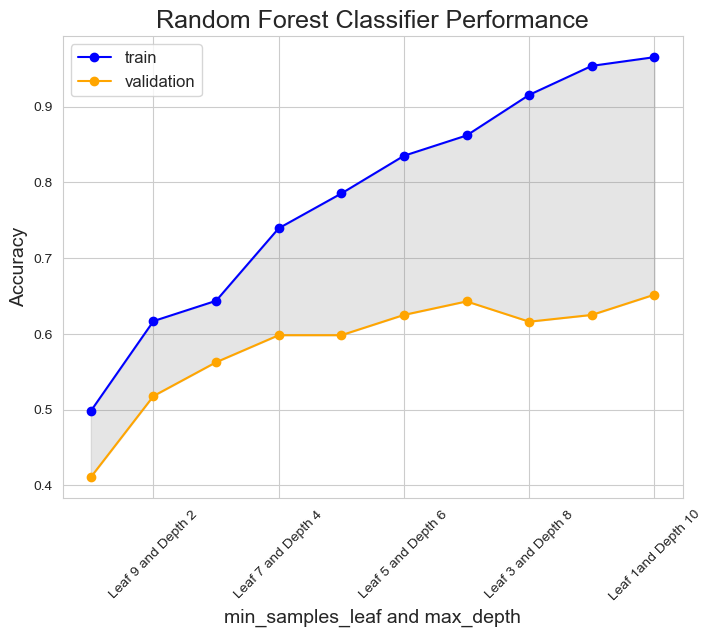

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.965517,0.651786,0.313732
1,2,9,0.954023,0.625000,0.329023
2,3,8,0.915709,0.616071,0.299637
3,4,7,0.862069,0.642857,0.219212
4,5,6,0.835249,0.625000,0.210249
5,6,5,0.785441,0.598214,0.187226
6,7,4,0.739464,0.598214,0.141249
7,8,3,0.643678,0.562500,0.081178
8,9,2,0.616858,0.517857,0.099001
9,10,1,0.498084,0.410714,0.087370


In [66]:
random_forest_scores(X_train_bow, y_train, X_validate_bow, y_validate)

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,2))

X_train_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [ ]:
forest = RandomForestClassifier(max_depth=20, min_samples_leaf=5)

forest.fit(X_train_bow, y_train)
forest.score(X_train_bow, y_train)

In [ ]:
forest.score(X_validate_bow, y_validate)

### Count and Naive Bayes

In [72]:
#get two words at once!
cv = CountVectorizer()

X_train_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)

In [73]:
mnb = MultinomialNB()

mnb.fit(X_train_bow, y_train)
mnb.score(X_train_bow, y_train)

0.6436781609195402

In [74]:
mnb.score(X_validate_bow, y_validate)

0.5

So far this is the best one. I.e. moderate cleaning with no ngrams, using count vectorizer

### TF-IDF and Naive Bayes

In [56]:
tfidf = TfidfVectorizer()

X_train_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [57]:
mnb = MultinomialNB()

mnb.fit(X_train_bow, y_train)
mnb.score(X_train_bow, y_train)

0.6628352490421456

In [58]:
mnb.score(X_validate_bow, y_validate)

0.5982142857142857

In [59]:
def random_forest_scores(X_bow, y_train, X_validate_bow, y_validate):
    """
    Trains and evaluates a random forest classifier with different combinations of hyperparameters. The function takes in
    training and validation datasets, and returns a dataframe summarizing the model performance on each combination of
    hyperparameters.
    Parameters:
    -----------
    X_train : pandas DataFrame
        Features of the training dataset.
    y_train : pandas Series
        Target variable of the training dataset.
    X_validate : pandas DataFrame
        Features of the validation dataset.
    y_validate : pandas Series
        Target variable of the validation dataset.
    Returns:
    --------
    df : pandas DataFrame
        A dataframe summarizing the model performance on each combination of hyperparameters.
    """
    #define variables
    train_scores = []
    validate_scores = []
    min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
    max_depth_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    for min_samples_leaf, max_depth in zip(min_samples_leaf_values, max_depth_values):
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth,random_state=123)
        rf.fit(X_bow, y_train)
        train_score = rf.score(X_bow, y_train)
        validate_score = rf.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        validate_scores.append(validate_score)
    # Calculate the difference between the train and validation scores
    diff_scores = [train_score - validate_score for train_score, validate_score in zip(train_scores, validate_scores)]
    #Put results into a dataframe
    df = pd.DataFrame({
        'min_samples_leaf': min_samples_leaf_values,
        'max_depth': max_depth_values,
        'train_score': train_scores,
        'validate_score': validate_scores,
        'diff_score': diff_scores})
    # Set plot style
    sns.set_style('whitegrid')
    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(max_depth_values, train_scores, label='train', marker='o', color='blue')
    plt.plot(max_depth_values, validate_scores, label='validation', marker='o', color='orange')
    plt.fill_between(max_depth_values, train_scores, validate_scores, alpha=0.2, color='gray')
    plt.xticks([2,4,6,8,10],['Leaf 9 and Depth 2','Leaf 7 and Depth 4','Leaf 5 and Depth 6','Leaf 3 and Depth 8','Leaf 1and Depth 10'], rotation = 45)
    plt.xlabel('min_samples_leaf and max_depth', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Random Forest Classifier Performance', fontsize=18)
    plt.legend(fontsize=12)
    plt.show()
    return df

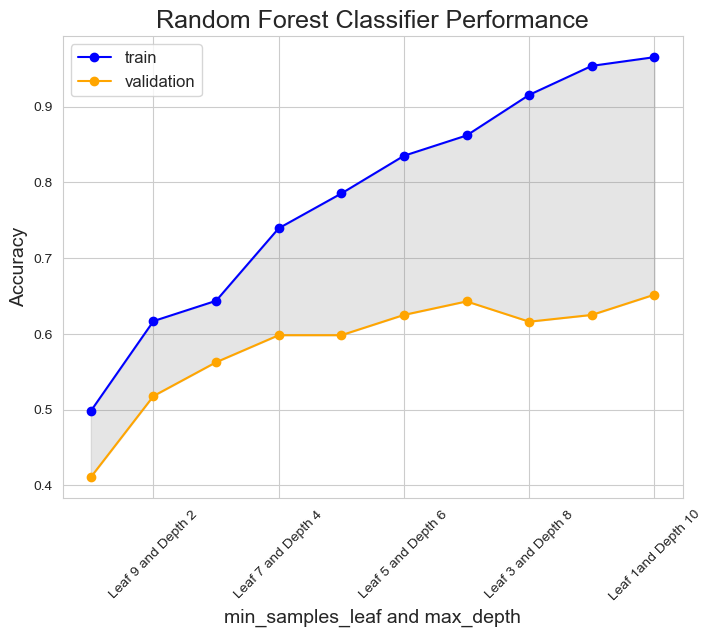

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.965517,0.651786,0.313732
1,2,9,0.954023,0.625000,0.329023
2,3,8,0.915709,0.616071,0.299637
3,4,7,0.862069,0.642857,0.219212
4,5,6,0.835249,0.625000,0.210249
5,6,5,0.785441,0.598214,0.187226
6,7,4,0.739464,0.598214,0.141249
7,8,3,0.643678,0.562500,0.081178
8,9,2,0.616858,0.517857,0.099001
9,10,1,0.498084,0.410714,0.087370


In [64]:
random_forest_scores(X_train_bow, y_train, X_validate_bow, y_validate)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
def decision_tree(X_bow, X_validate_bow, y_train, y_validate):
    """
    This function trains a decision tree classifier on the provided training data, and evaluates its performance on the
    validation data for different values of the 'max_depth' hyperparameter. It then generates a plot of the training and
    validation accuracy scores as a function of 'max_depth', and returns a DataFrame containing these scores.
    Parameters:
    - X_train (pandas.DataFrame): A DataFrame containing the features for the training data.
    - X_validate (pandas.DataFrame): A DataFrame containing the features for the validation data.
    - y_train (pandas.Series): A Series containing the target variable for the training data.
    - y_validate (pandas.Series): A Series containing the target variable for the validation data.
    Returns:
    - scores_df (pandas.DataFrame): A DataFrame containing the training and validation accuracy scores, as well as the
      difference between them, for different values of the 'max_depth' hyperparameter.
    """
    # get data
    scores_all = []
    for x in range(1,20):
        tree = DecisionTreeClassifier(max_depth=x, random_state=123)
        tree.fit(X_bow, y_train)
        train_acc = tree.score(X_bow,y_train)
        val_acc = tree.score(X_validate_bow, y_validate)
        score_diff = train_acc - val_acc
        scores_all.append([x, train_acc, val_acc, score_diff])
    scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc','val_acc','score_diff'])
    # Plot the results
    sns.set_style('whitegrid')
    plt.plot(scores_df['max_depth'], scores_df['train_acc'], label='Train score')
    plt.plot(scores_df['max_depth'], scores_df['val_acc'], label='Validation score')
    plt.fill_between(scores_df['max_depth'], scores_df['train_acc'], scores_df['val_acc'], alpha=0.2, color='gray')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Max Depth')
    plt.legend()
    plt.show()
    return scores_df

In [76]:
len(train[train.language=='C#'])

AttributeError: 'numpy.float64' object has no attribute 'language'